# 4 - Probability Distributions

**Goal:** Understand Normal, Binomial, and Poisson distributions and when to use each

**What you'll learn:**
- Concept of probability distributions
- Normal (Gaussian) distribution
- Binomial distribution
- Poisson distribution
- When to use each distribution
- Real-world applications

---

## Setup: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, poisson

sns.set_style("whitegrid")
print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


---

## SECTION 1: What is a Probability Distribution?

A **probability distribution** describes:
- All possible outcomes
- How likely each outcome is

**Types:**
- **Discrete:** Countable outcomes (0, 1, 2, ...)
- **Continuous:** Any value in a range (1.5, 1.51, 1.512, ...)

In [2]:
print("EXAMPLE: Rolling a Die")
print("="*60)
print("\nDice outcomes: {1, 2, 3, 4, 5, 6}")
print("Each has equal probability: 1/6 ≈ 0.1667")
print("\nThis is a DISCRETE UNIFORM DISTRIBUTION")
print("(discrete = whole numbers, uniform = all equally likely)")

# Simulate rolling die 10,000 times
die_rolls = np.random.randint(1, 7, 10000)

# Count outcomes
outcomes, counts = np.unique(die_rolls, return_counts=True)
probabilities = counts / len(die_rolls)

print(f"\nSimulation results (10,000 rolls):")
for outcome, prob in zip(outcomes, probabilities):
    print(f"  P({outcome}) = {prob:.4f} (expected: 0.1667)")

EXAMPLE: Rolling a Die

Dice outcomes: {1, 2, 3, 4, 5, 6}
Each has equal probability: 1/6 ≈ 0.1667

This is a DISCRETE UNIFORM DISTRIBUTION
(discrete = whole numbers, uniform = all equally likely)

Simulation results (10,000 rolls):
  P(1) = 0.1714 (expected: 0.1667)
  P(2) = 0.1627 (expected: 0.1667)
  P(3) = 0.1581 (expected: 0.1667)
  P(4) = 0.1640 (expected: 0.1667)
  P(5) = 0.1749 (expected: 0.1667)
  P(6) = 0.1689 (expected: 0.1667)


---

## SECTION 2: Normal (Gaussian) Distribution

### The Bell Curve

The **most important distribution in statistics**!

**Shape:** Symmetric, bell-shaped

**Parameters:**
- μ (mu) = Mean
- σ (sigma) = Standard deviation

**The 68-95-99.7 Rule:**
- 68% of data within μ ± 1σ
- 95% of data within μ ± 2σ
- 99.7% of data within μ ± 3σ

In [3]:
print("NORMAL DISTRIBUTION")
print("="*60)
print("\nExample: IQ Scores")
print("Mean: 100, Std Dev: 15")

mean_iq = 100
std_iq = 15

# Calculate probabilities
P_below_85 = norm.cdf(85, mean_iq, std_iq)
P_85_115 = norm.cdf(115, mean_iq, std_iq) - norm.cdf(85, mean_iq, std_iq)
P_above_115 = 1 - norm.cdf(115, mean_iq, std_iq)
print(f"\nP(IQ < 85) = {P_below_85:.4f} = {P_below_85*100:.1f}%")
print(f"P(85 < IQ < 115) = {P_85_115:.4f} = {P_85_115*100:.1f}%")
print(f"P(IQ > 115) = {P_above_115:.4f} = {P_above_115*100:.1f}%")
print(f"\nNotice: 85-115 is μ ± 1σ = {P_85_115*100:.1f}% (approximately 68%)")

NORMAL DISTRIBUTION

Example: IQ Scores
Mean: 100, Std Dev: 15

P(IQ < 85) = 0.1587 = 15.9%
P(85 < IQ < 115) = 0.6827 = 68.3%
P(IQ > 115) = 0.1587 = 15.9%

Notice: 85-115 is μ ± 1σ = 68.3% (approximately 68%)


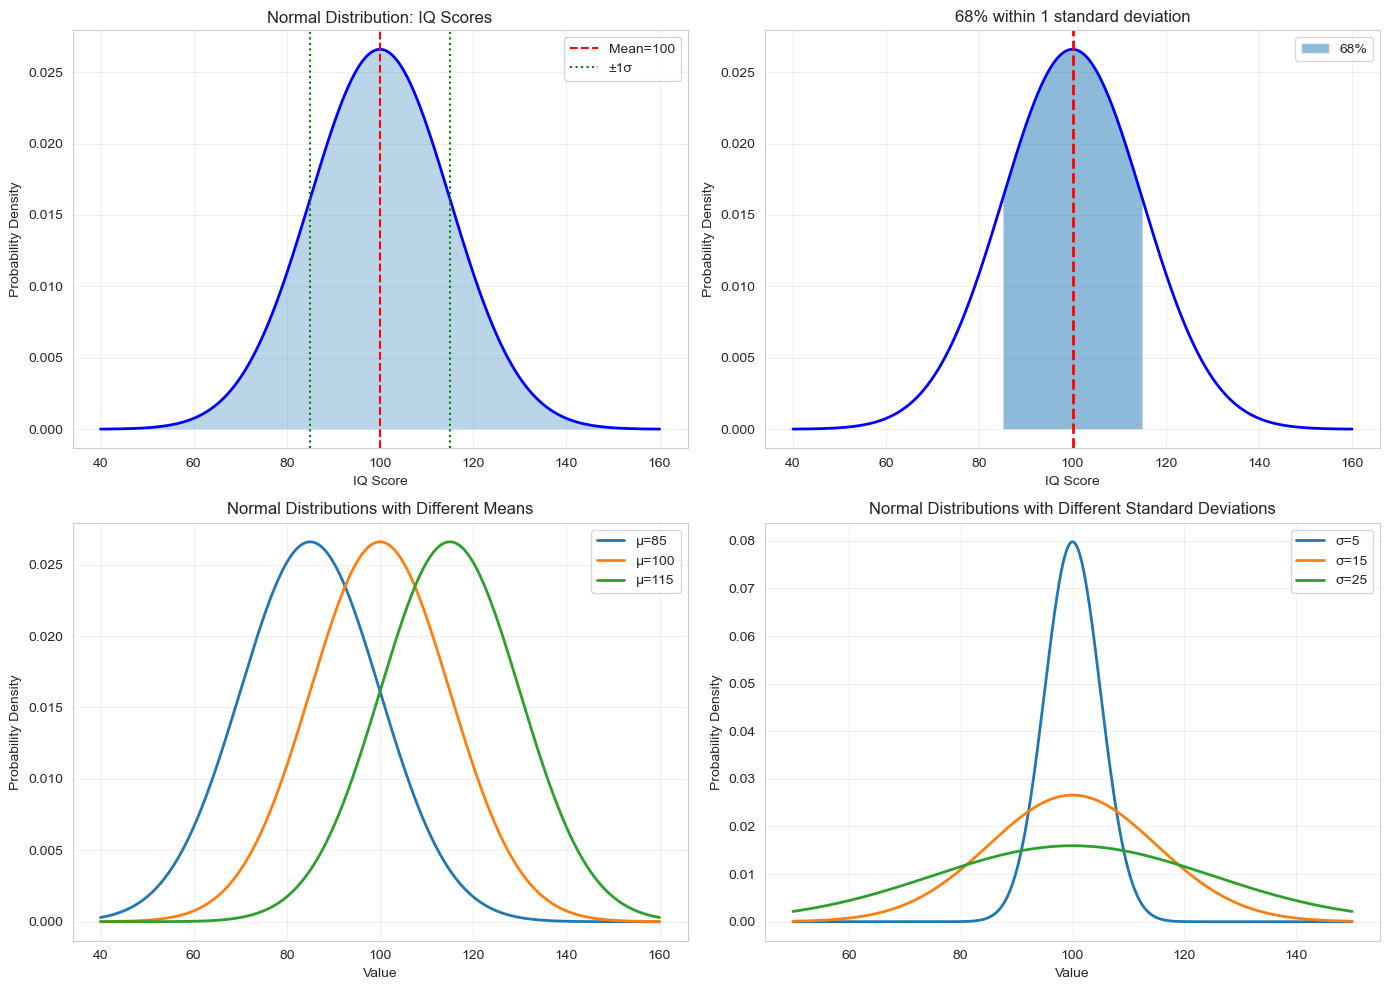

Chart saved as 'normal_distributions.png'


In [4]:
# Visualize Normal Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Basic Normal Distribution
ax1 = axes[0, 0]
x = np.linspace(mean_iq - 4*std_iq, mean_iq + 4*std_iq, 1000)
y = norm.pdf(x, mean_iq, std_iq)
ax1.plot(x, y, 'b-', linewidth=2)
ax1.fill_between(x, y, alpha=0.3)
ax1.axvline(mean_iq, color='r', linestyle='--', label=f'Mean={mean_iq}')
ax1.axvline(mean_iq - std_iq, color='g', linestyle=':', label=f'±1σ')
ax1.axvline(mean_iq + std_iq, color='g', linestyle=':')
ax1.set_xlabel('IQ Score')
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution: IQ Scores')
ax1.legend()
ax1.grid(alpha=0.3)
# Plot 2: 68-95-99.7 Rule
ax2 = axes[0, 1]
x_1sigma = np.linspace(mean_iq - std_iq, mean_iq + std_iq, 1000)
y_1sigma = norm.pdf(x_1sigma, mean_iq, std_iq)
ax2.plot(x, y, 'b-', linewidth=2)
ax2.fill_between(x_1sigma, y_1sigma, alpha=0.5, label='68%')
ax2.axvline(mean_iq, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('IQ Score')
ax2.set_ylabel('Probability Density')
ax2.set_title('68% within 1 standard deviation')
ax2.legend()
ax2.grid(alpha=0.3)
# Plot 3: Different means
ax3 = axes[1, 0]
for m, label in [(85, 'μ=85'), (100, 'μ=100'), (115, 'μ=115')]:
    y_temp = norm.pdf(x, m, 15)
    ax3.plot(x, y_temp, linewidth=2, label=label)
ax3.set_xlabel('Value')
ax3.set_ylabel('Probability Density')
ax3.set_title('Normal Distributions with Different Means')
ax3.legend()
ax3.grid(alpha=0.3)
# Plot 4: Different standard deviations
ax4 = axes[1, 1]
x_wider = np.linspace(50, 150, 1000)
for s, label in [(5, 'σ=5'), (15, 'σ=15'), (25, 'σ=25')]:
    y_temp = norm.pdf(x_wider, 100, s)
    ax4.plot(x_wider, y_temp, linewidth=2, label=label)
ax4.set_xlabel('Value')
ax4.set_ylabel('Probability Density')
ax4.set_title('Normal Distributions with Different Standard Deviations')
ax4.legend()
ax4.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('normal_distributions.png', dpi=100, bbox_inches='tight')
plt.show()
print("Chart saved as 'normal_distributions.png'")

---

## SECTION 3: Binomial Distribution

### Counting Successes in Fixed Trials

**Use when:**
- Fixed number of trials (n)
- Each trial has two outcomes (success/failure)
- Probability of success is constant (p)

**Parameters:**
- n = Number of trials
- p = Probability of success

**Examples:**
- Number of heads in 10 coin flips
- Number of clicks in 100 ad impressions
- Number of defects in 50 products

In [5]:
print("BINOMIAL DISTRIBUTION")
print("="*60)
print("\nExample: Coin Flipping")
print("Flip 10 coins. How many come up heads?")

n = 10  # 10 flips
p = 0.5  # 50% chance of heads

# Possible outcomes: 0, 1, 2, ..., 10
k = np.arange(0, n+1)
probs = binom.pmf(k, n, p)

print(f"\nProbabilities:")
for outcome, prob in zip(k, probs):
    print(f"  P(X = {outcome:2d}) = {prob:.4f} = {prob*100:.1f}%")

BINOMIAL DISTRIBUTION

Example: Coin Flipping
Flip 10 coins. How many come up heads?

Probabilities:
  P(X =  0) = 0.0010 = 0.1%
  P(X =  1) = 0.0098 = 1.0%
  P(X =  2) = 0.0439 = 4.4%
  P(X =  3) = 0.1172 = 11.7%
  P(X =  4) = 0.2051 = 20.5%
  P(X =  5) = 0.2461 = 24.6%
  P(X =  6) = 0.2051 = 20.5%
  P(X =  7) = 0.1172 = 11.7%
  P(X =  8) = 0.0439 = 4.4%
  P(X =  9) = 0.0098 = 1.0%
  P(X = 10) = 0.0010 = 0.1%


In [6]:
# Cumulative probabilities
print("\nCumulative Probabilities:")
print(f"  P(X ≤ 3) = {binom.cdf(3, n, p):.4f} = {binom.cdf(3, n, p)*100:.1f}%")
print(f"  P(X ≤ 5) = {binom.cdf(5, n, p):.4f} = {binom.cdf(5, n, p)*100:.1f}%")
print(f"  P(X ≥ 7) = {1 - binom.cdf(6, n, p):.4f} = {(1 - binom.cdf(6, n, p))*100:.1f}%")

print(f"\nExpected value: E(X) = n × p = {n} × {p} = {n*p}")
print(f"Standard deviation: σ = √(n × p × (1-p)) = {np.sqrt(n*p*(1-p)):.2f}")


Cumulative Probabilities:
  P(X ≤ 3) = 0.1719 = 17.2%
  P(X ≤ 5) = 0.6230 = 62.3%
  P(X ≥ 7) = 0.1719 = 17.2%

Expected value: E(X) = n × p = 10 × 0.5 = 5.0
Standard deviation: σ = √(n × p × (1-p)) = 1.58


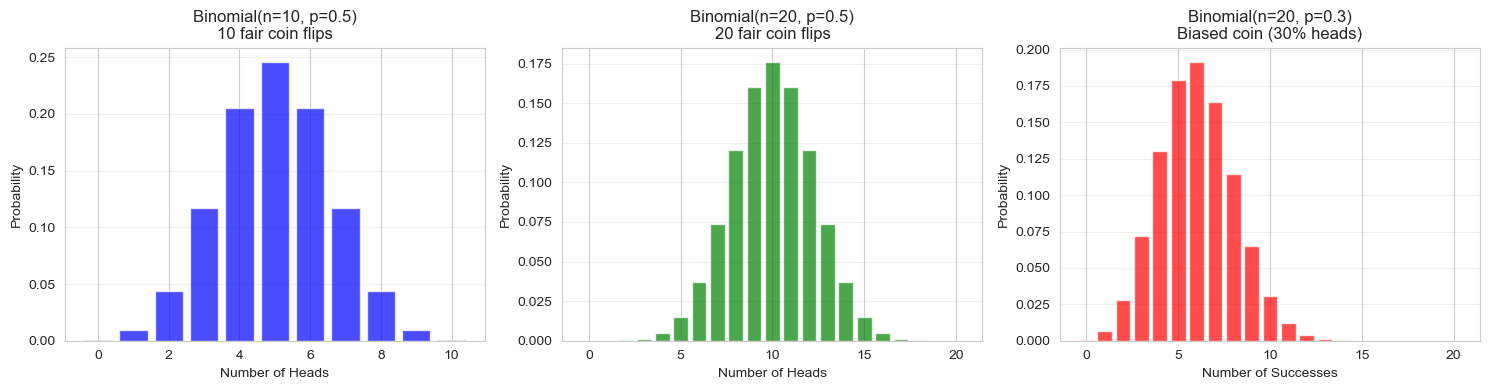

Chart saved as 'binomial_distributions.png'


In [7]:
# Visualize Binomial Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: 10 flips, 50% probability
ax1 = axes[0]
k1 = np.arange(0, 11)
probs1 = binom.pmf(k1, 10, 0.5)
ax1.bar(k1, probs1, alpha=0.7, color='blue')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Binomial(n=10, p=0.5)\n10 fair coin flips')
ax1.grid(alpha=0.3, axis='y')
# Plot 2: 20 flips, 50% probability
ax2 = axes[1]
k2 = np.arange(0, 21)
probs2 = binom.pmf(k2, 20, 0.5)
ax2.bar(k2, probs2, alpha=0.7, color='green')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Probability')
ax2.set_title('Binomial(n=20, p=0.5)\n20 fair coin flips')
ax2.grid(alpha=0.3, axis='y')
# Plot 3: 20 flips, 30% probability (biased coin)
ax3 = axes[2]
k3 = np.arange(0, 21)
probs3 = binom.pmf(k3, 20, 0.3)
ax3.bar(k3, probs3, alpha=0.7, color='red')
ax3.set_xlabel('Number of Successes')
ax3.set_ylabel('Probability')
ax3.set_title('Binomial(n=20, p=0.3)\nBiased coin (30% heads)')
ax3.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('binomial_distributions.png', dpi=100, bbox_inches='tight')
plt.show()
print("Chart saved as 'binomial_distributions.png'")

---

## SECTION 4: Poisson Distribution

### Counting Events Over Time/Space

**Use when:**
- Events happen randomly
- Events occur at constant average rate
- No fixed number of trials

**Parameter:**
- λ (lambda) = Average number of events in interval

**Examples:**
- Customer arrivals per hour
- Typos per page
- Phone calls per day
- Website errors per hour

In [8]:
print("POISSON DISTRIBUTION")
print("="*60)
print("\nExample: Customer Arrivals at a Store")
print("Average: 5 customers per hour")

lambda_rate = 5

# Possible outcomes: 0, 1, 2, ..., 20
k = np.arange(0, 21)
probs = poisson.pmf(k, lambda_rate)

print(f"\nProbabilities (showing first 11):")
for outcome, prob in zip(k[:11], probs[:11]):
    print(f"  P(X = {outcome:2d}) = {prob:.4f} = {prob*100:.1f}%")

POISSON DISTRIBUTION

Example: Customer Arrivals at a Store
Average: 5 customers per hour

Probabilities (showing first 11):
  P(X =  0) = 0.0067 = 0.7%
  P(X =  1) = 0.0337 = 3.4%
  P(X =  2) = 0.0842 = 8.4%
  P(X =  3) = 0.1404 = 14.0%
  P(X =  4) = 0.1755 = 17.5%
  P(X =  5) = 0.1755 = 17.5%
  P(X =  6) = 0.1462 = 14.6%
  P(X =  7) = 0.1044 = 10.4%
  P(X =  8) = 0.0653 = 6.5%
  P(X =  9) = 0.0363 = 3.6%
  P(X = 10) = 0.0181 = 1.8%


In [9]:
# Cumulative probabilities
print("\nCumulative Probabilities:")
print(f"  P(X ≤ 3) = {poisson.cdf(3, lambda_rate):.4f}")
print(f"  P(X ≤ 5) = {poisson.cdf(5, lambda_rate):.4f}")
print(f"  P(X ≤ 7) = {poisson.cdf(7, lambda_rate):.4f}")
print(f"  P(X ≥ 10) = {1 - poisson.cdf(9, lambda_rate):.4f}")

print(f"\nFor Poisson distribution:")
print(f"  Expected value: E(X) = λ = {lambda_rate}")
print(f"  Standard deviation: σ = √λ = {np.sqrt(lambda_rate):.2f}")


Cumulative Probabilities:
  P(X ≤ 3) = 0.2650
  P(X ≤ 5) = 0.6160
  P(X ≤ 7) = 0.8666
  P(X ≥ 10) = 0.0318

For Poisson distribution:
  Expected value: E(X) = λ = 5
  Standard deviation: σ = √λ = 2.24


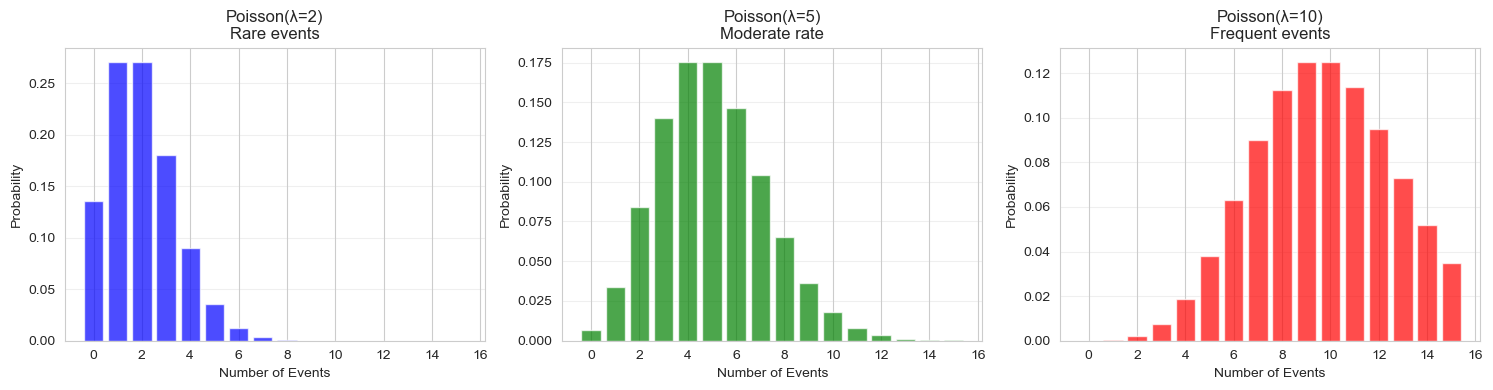

Chart saved as 'poisson_distributions.png'


In [10]:
# Visualize Poisson Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: λ = 2
ax1 = axes[0]
k_plot = np.arange(0, 16)
probs_2 = poisson.pmf(k_plot, 2)
ax1.bar(k_plot, probs_2, alpha=0.7, color='blue')
ax1.set_xlabel('Number of Events')
ax1.set_ylabel('Probability')
ax1.set_title('Poisson(λ=2)\nRare events')
ax1.grid(alpha=0.3, axis='y')
# Plot 2: λ = 5
ax2 = axes[1]
probs_5 = poisson.pmf(k_plot, 5)
ax2.bar(k_plot, probs_5, alpha=0.7, color='green')
ax2.set_xlabel('Number of Events')
ax2.set_ylabel('Probability')
ax2.set_title('Poisson(λ=5)\nModerate rate')
ax2.grid(alpha=0.3, axis='y')
# Plot 3: λ = 10
ax3 = axes[2]
probs_10 = poisson.pmf(k_plot, 10)
ax3.bar(k_plot, probs_10, alpha=0.7, color='red')
ax3.set_xlabel('Number of Events')
ax3.set_ylabel('Probability')
ax3.set_title('Poisson(λ=10)\nFrequent events')
ax3.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('poisson_distributions.png', dpi=100, bbox_inches='tight')
plt.show()
print("Chart saved as 'poisson_distributions.png'")

---

## SECTION 5: Choosing the Right Distribution

In [11]:
print("DECISION TREE: Which Distribution to Use?")
print("="*70)

print("\n1. Continuous data (measurements)?")
print("   → Usually NORMAL DISTRIBUTION")
print("   Examples: Heights, weights, test scores, temperatures")

print("\n2. Fixed number of trials, success/failure outcome?")
print("   → BINOMIAL DISTRIBUTION")
print("   Examples: Coin flips, ad clicks, product defects")

print("\n3. Events happening over time/space, rare?")
print("   → POISSON DISTRIBUTION")
print("   Examples: Customer arrivals, errors, phone calls")

DECISION TREE: Which Distribution to Use?

1. Continuous data (measurements)?
   → Usually NORMAL DISTRIBUTION
   Examples: Heights, weights, test scores, temperatures

2. Fixed number of trials, success/failure outcome?
   → BINOMIAL DISTRIBUTION
   Examples: Coin flips, ad clicks, product defects

3. Events happening over time/space, rare?
   → POISSON DISTRIBUTION
   Examples: Customer arrivals, errors, phone calls


---

## SECTION 6: Practice Problems

In [12]:
print("PRACTICE PROBLEM SET 1: Normal Distribution")
print("="*70)

print("\nProblem 1: Test Scores")
print("-"*70)
print("SAT scores: μ=500, σ=100")
print("\na) What % score below 400?")
P1a = norm.cdf(400, 500, 100)
print(f"   Answer: {P1a*100:.1f}%")

print("\nb) What % score between 400 and 600?")
P1b = norm.cdf(600, 500, 100) - norm.cdf(400, 500, 100)
print(f"   Answer: {P1b*100:.1f}%")

print("\nc) What score is in the 90th percentile?")
P1c = norm.ppf(0.90, 500, 100)
print(f"   Answer: {P1c:.0f}")

PRACTICE PROBLEM SET 1: Normal Distribution

Problem 1: Test Scores
----------------------------------------------------------------------
SAT scores: μ=500, σ=100

a) What % score below 400?
   Answer: 15.9%

b) What % score between 400 and 600?
   Answer: 68.3%

c) What score is in the 90th percentile?
   Answer: 628


In [13]:
print("\nPRACTICE PROBLEM SET 2: Binomial Distribution")
print("="*70)

print("\nProblem 2: Email Campaign")
print("-"*70)
print("Email sent to 1000 people, 3% click rate")
print("\na) Expected clicks?")
P2a = 1000 * 0.03
print(f"   Answer: {P2a:.0f}")

print("\nb) P(exactly 30 clicks)?")
P2b = binom.pmf(30, 1000, 0.03)
print(f"   Answer: {P2b:.4f}")

print("\nc) P(20 to 40 clicks)?")
P2c = binom.cdf(40, 1000, 0.03) - binom.cdf(19, 1000, 0.03)
print(f"   Answer: {P2c:.4f}")


PRACTICE PROBLEM SET 2: Binomial Distribution

Problem 2: Email Campaign
----------------------------------------------------------------------
Email sent to 1000 people, 3% click rate

a) Expected clicks?
   Answer: 30

b) P(exactly 30 clicks)?
   Answer: 0.0737

c) P(20 to 40 clicks)?
   Answer: 0.9494


In [14]:
print("\nPRACTICE PROBLEM SET 3: Poisson Distribution")
print("="*70)

print("\nProblem 3: Website Traffic")
print("-"*70)
print("Website gets average 100 page views per hour")
print("\na) P(exactly 100 views)?")
P3a = poisson.pmf(100, 100)
print(f"   Answer: {P3a:.4f}")

print("\nb) P(80-120 views)?")
P3b = poisson.cdf(120, 100) - poisson.cdf(79, 100)
print(f"   Answer: {P3b:.4f}")

print("\nc) P(more than 150 views)?")
P3c = 1 - poisson.cdf(150, 100)
print(f"   Answer: {P3c:.4f}")


PRACTICE PROBLEM SET 3: Poisson Distribution

Problem 3: Website Traffic
----------------------------------------------------------------------
Website gets average 100 page views per hour

a) P(exactly 100 views)?
   Answer: 0.0399

b) P(80-120 views)?
   Answer: 0.9599

c) P(more than 150 views)?
   Answer: 0.0000


---

## Final Summary

In [15]:
print("\n" + "="*70)
print("COMPLETE! You now understand probability distributions!")
print("="*70)

print("\nThree Key Distributions:")
print("\n1. NORMAL DISTRIBUTION:")
print("   - Bell curve")
print("   - Continuous data")
print("   - Parameters: μ (mean), σ (std dev)")
print("   - 68-95-99.7 rule")
print("   - Examples: Heights, test scores, IQ")

print("\n2. BINOMIAL DISTRIBUTION:")
print("   - Discrete outcomes")
print("   - Fixed number of trials")
print("   - Success/failure")
print("   - Parameters: n, p")
print("   - Examples: Coin flips, clicks, defects")

print("\n3. POISSON DISTRIBUTION:")
print("   - Discrete events")
print("   - Events over time/space")
print("   - No fixed number of trials")
print("   - Parameter: λ")
print("   - Examples: Arrivals, errors, phone calls")

print("\n" + "="*70)


COMPLETE! You now understand probability distributions!

Three Key Distributions:

1. NORMAL DISTRIBUTION:
   - Bell curve
   - Continuous data
   - Parameters: μ (mean), σ (std dev)
   - 68-95-99.7 rule
   - Examples: Heights, test scores, IQ

2. BINOMIAL DISTRIBUTION:
   - Discrete outcomes
   - Fixed number of trials
   - Success/failure
   - Parameters: n, p
   - Examples: Coin flips, clicks, defects

3. POISSON DISTRIBUTION:
   - Discrete events
   - Events over time/space
   - No fixed number of trials
   - Parameter: λ
   - Examples: Arrivals, errors, phone calls

